# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

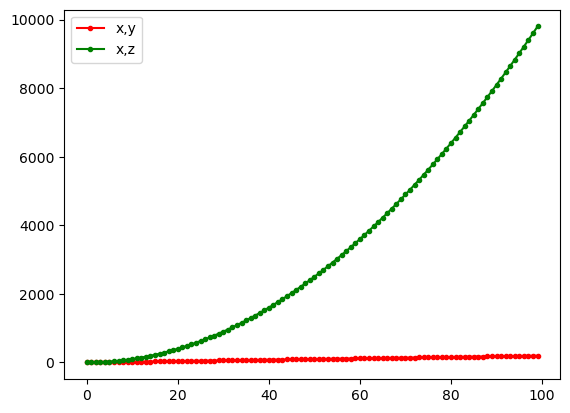

In [24]:
# Method 1
plt.plot(x,y,'r.-',label='x,y')
plt.plot(x,z, 'g.-', label="x,z")
plt.legend()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

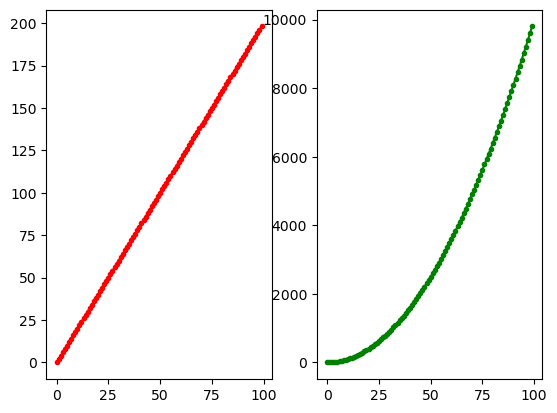

In [29]:
# Method 2
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot(x,y,'r.-',label='x,y')
ax2.plot(x,z,'g.-',label='x,z')
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

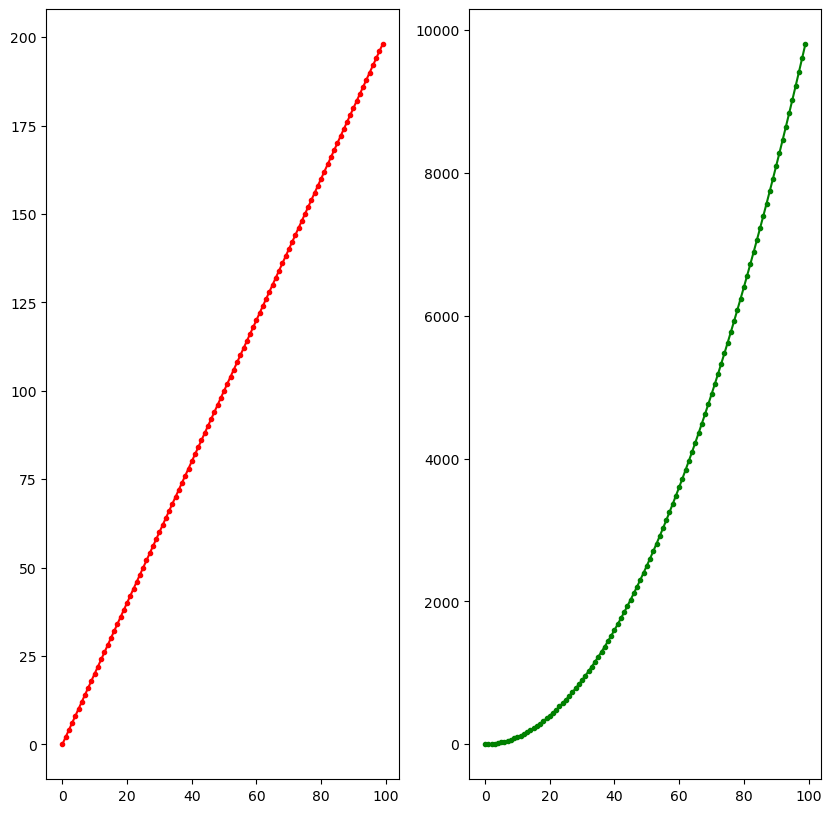

In [33]:
# your code here
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
ax1.plot(x,y,'r.-')
ax2.plot(x,z,'g.-')
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

In [35]:
# your code here

y1 = x**2
y2 = math.e**x

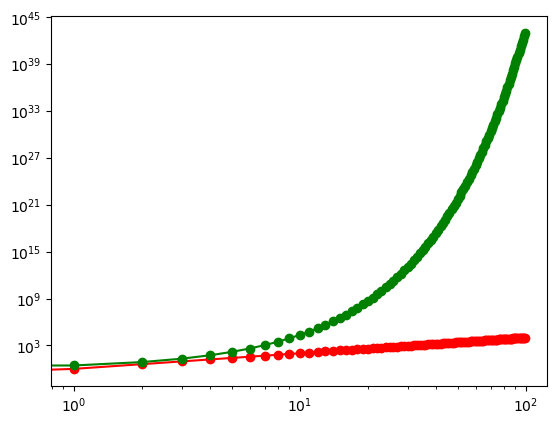

In [38]:
plt.plot(x,y1,'ro-', label='y=x**2')
plt.plot(x,y2,'go-', label='y=e**x')
plt.xscale('log')
plt.yscale('log')
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

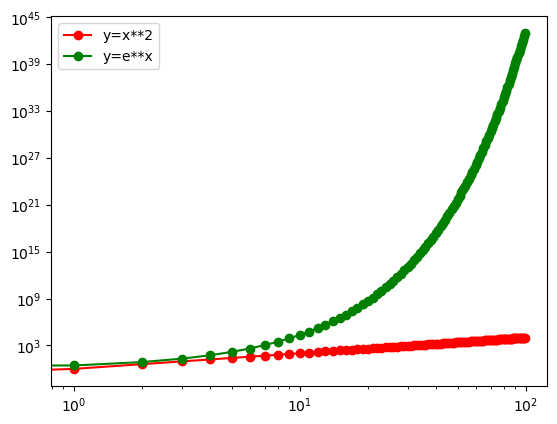

In [39]:
# your code here
plt.plot(x,y1,'ro-', label='y=x**2')
plt.plot(x,y2,'go-', label='y=e**x')
plt.xscale('log')
plt.yscale('log')
plt.legend()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [40]:
# your code here
fitbit = pd.read_csv('Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

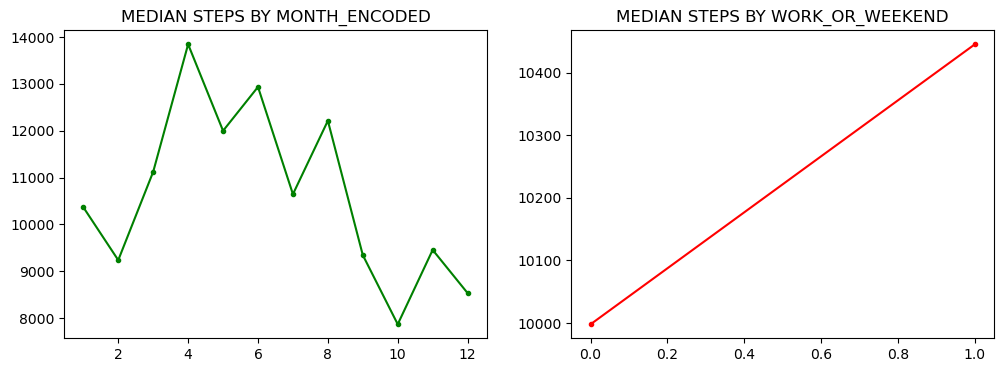

<Figure size 640x480 with 0 Axes>

In [52]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
monthly_steps = fitbit.groupby('Months_encoded').agg({'Steps':'median'})


# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
work_weekend_steps = fitbit.groupby('Work_or_Weekend').agg({'Steps':'median'})
f, (a1, a2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
a1.plot(monthly_steps, 'g.-')
a1.set_title('MEDIAN STEPS BY MONTH_ENCODED')
a2.plot(work_weekend_steps, 'r.-')
a2.set_title('MEDIAN STEPS BY WORK_OR_WEEKEND')
plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

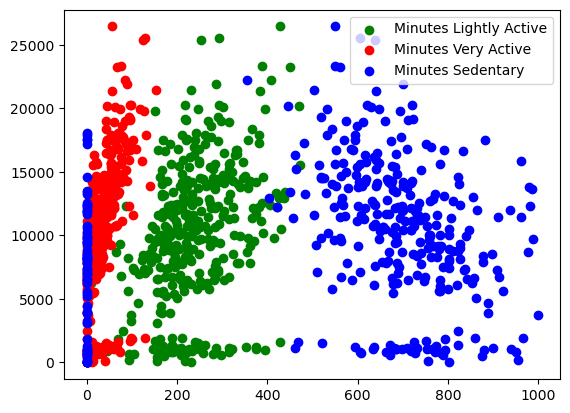

In [62]:
# your code here

p = [('Minutes Lightly Active','green'),('Minutes Very Active','red'),('Minutes Sedentary','blue')]

for i in p:
    plt.scatter(fitbit[i[0]], fitbit['Steps'], c=i[1], label=i[0])
plt.legend()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [2]:
# your code here
titanic=pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [3]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [6]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(['int64','float64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [7]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes('object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [8]:
# your code here
plt.style.use('classic')

#### Use the right visulalization to show the distribution of column `Age`.

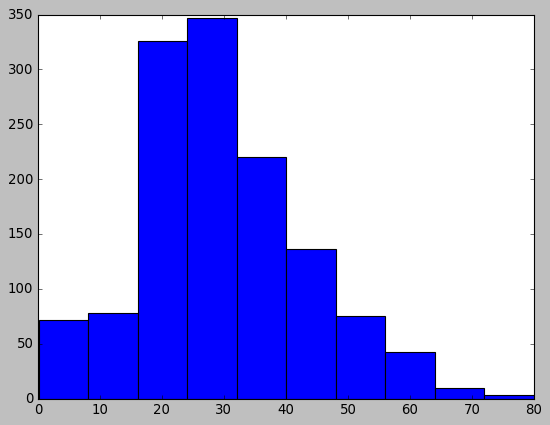

<Figure size 960x480 with 0 Axes>

In [13]:
# your code here
plt.hist(titanic['Age'],bins=10)
plt.figure(figsize=(12,6))
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

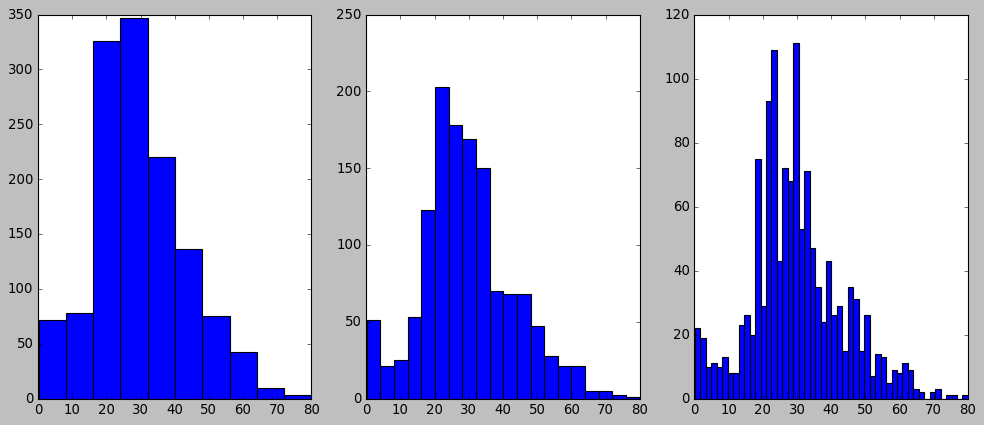

In [15]:
# your code here
f,(a1,a2,a3) = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
a1.hist(titanic['Age'],bins=10)
a2.hist(titanic['Age'],bins=20)
a3.hist(titanic['Age'],bins=50)
plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
bin size changes the way peak value could be perceived. If the bin size is not selected wisely, you might make
wrong assumptions around population representations and distributions.
"""

#### Use seaborn to show the distribution of column `Age`.

<Axes: xlabel='Age', ylabel='Count'>

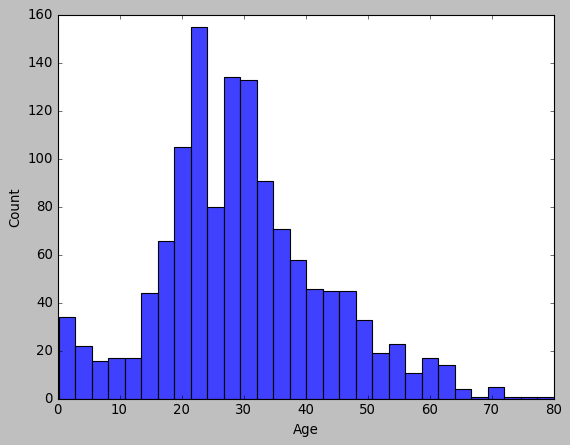

In [16]:
# your code here
sns.histplot(titanic['Age'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

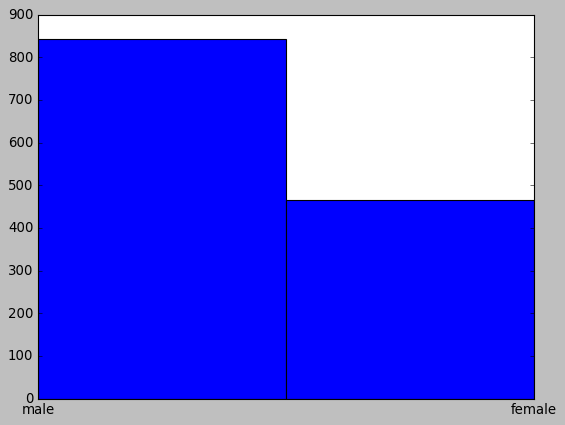

In [17]:
# Method 1 - matplotlib
# your code here
plt.hist(titanic['Gender'], bins=2)
plt.show()

<Axes: xlabel='Gender', ylabel='Count'>

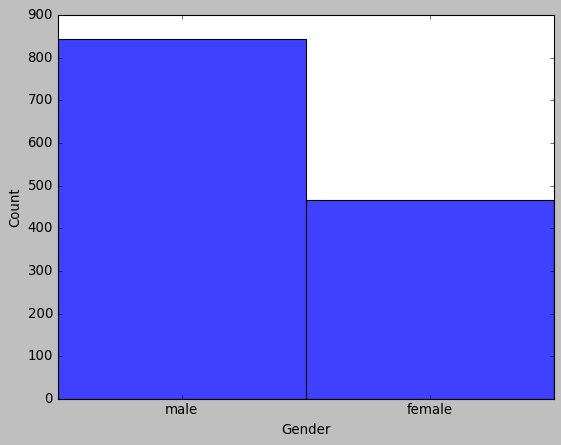

In [18]:
# Method 2 - seaborn
# your code here
sns.histplot(titanic['Gender'])

#### Use the right plot to visualize the column `Pclass`.

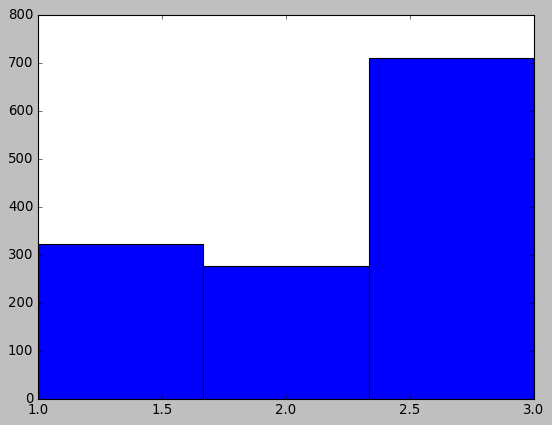

In [22]:
# your code here
plt.hist(titanic['Pclass'],bins=3)
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

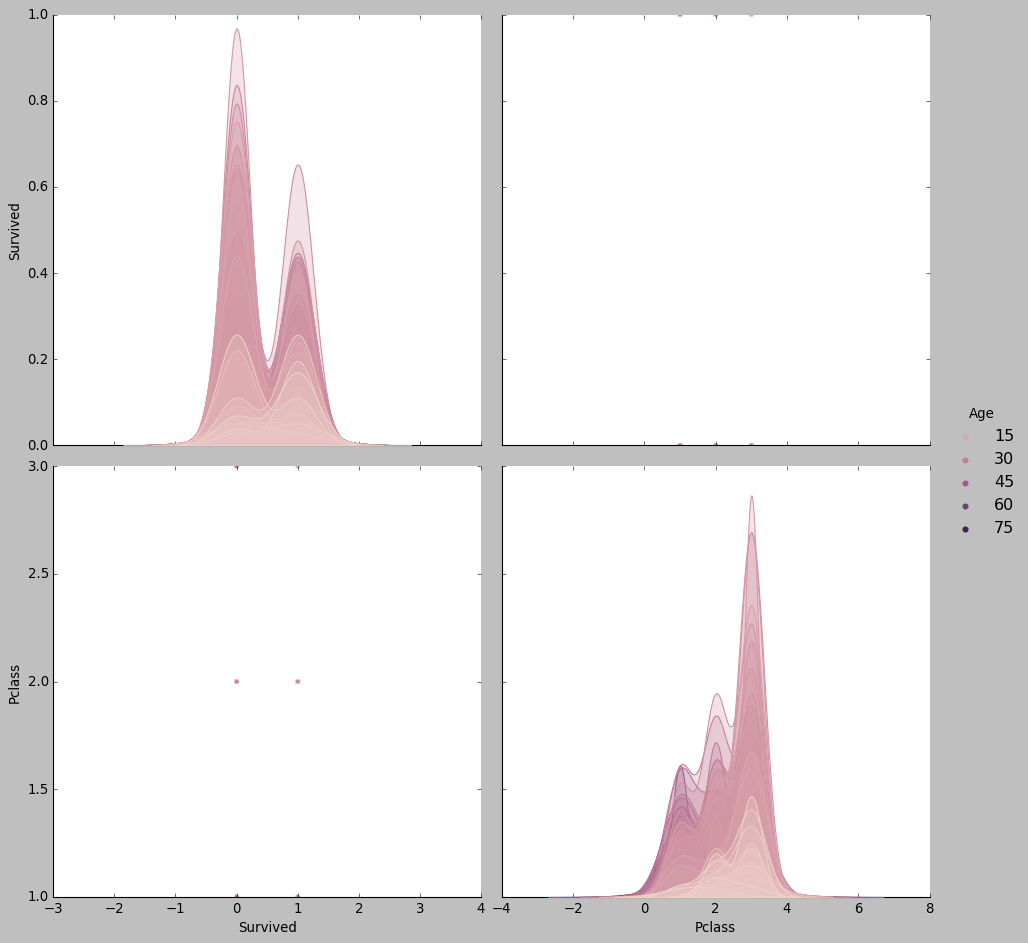

In [43]:
# your code here
sns.pairplot(titanic[['Survived','Pclass', 'Age']],hue='Age',height=6)

In [ ]:
"""
We used pairplot to show all the numerical data and the age distribution on those
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
First class has higher population of older people
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

<Axes: xlabel='Age', ylabel='Count'>

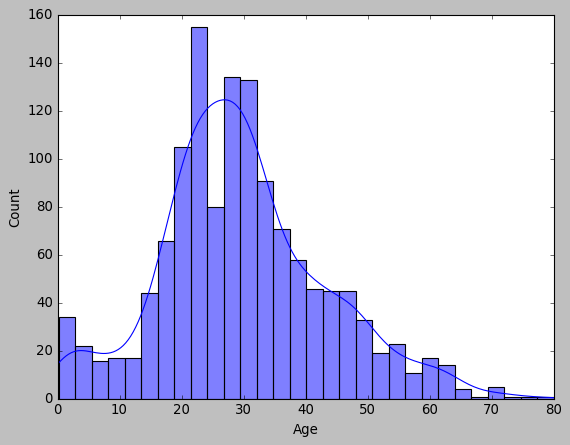

In [30]:
# your code here
sns.histplot(titanic['Age'],kde=True)

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
Majority of our population is midde aged people
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

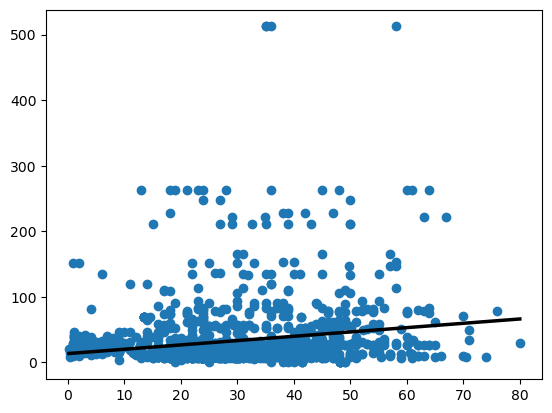

In [12]:
# Method 1 - matplotlib
# your code here
f, ax = plt.subplots()

ax.scatter(titanic['Age'],titanic['Fare'])
a,b = np.polyfit(titanic['Age'],titanic['Fare'], deg=1)
xseq = np.linspace(titanic['Age'].min(), titanic['Age'].max(), num=100)
ax.plot(xseq, a * xseq + b, color="k", lw=2.5)
plt.show()

<Axes: xlabel='Age', ylabel='Fare'>

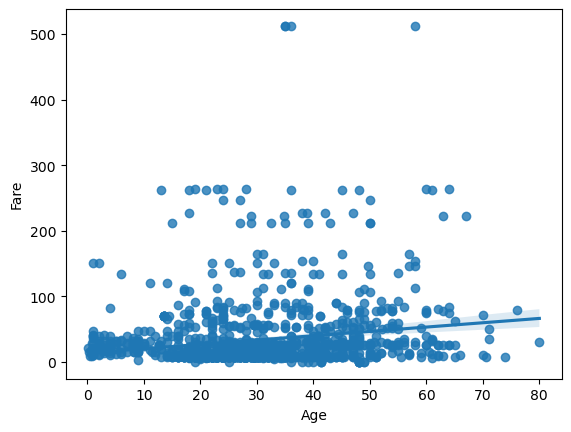

In [4]:
# Method 2 - seaborn
# your code here
sns.regplot(x="Age", y="Fare", data=titanic[['Age','Fare']])

#### Plot the correlation matrix using seaborn.

<Axes: >

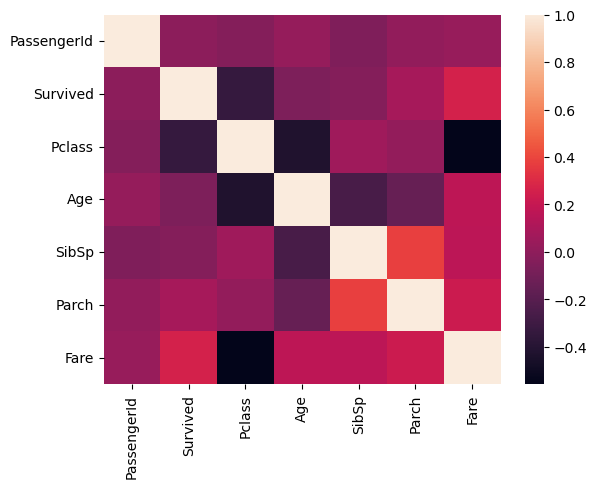

In [14]:
# your code here

sns.heatmap(titanic.corr(numeric_only=True))


#### What are the most correlated features?

In [ ]:
"""
There is negative correlation between PClass and Fare/Age and Survived. 
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

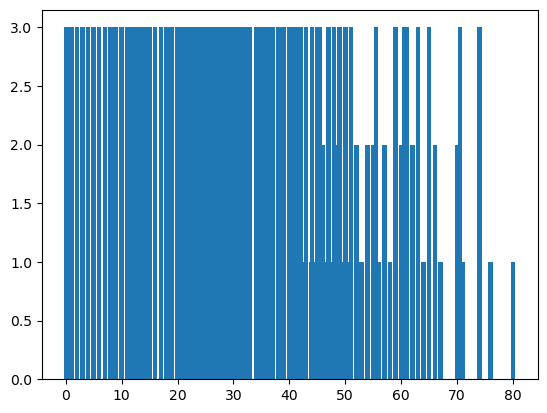

In [30]:
# your code here
d = titanic.sort_values('Age')
plt.bar(d['Age'],d['Pclass'])
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

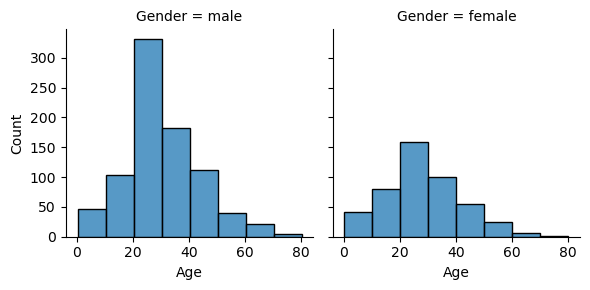

In [33]:
# your code here
g = sns.FacetGrid(titanic, col='Gender')
g.map_dataframe(sns.histplot, x='Age', binwidth=10)